# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#SET UP LISTS FOR DF
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
max_temp = []
wind_speed = []
lng = []


counter = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    
    print(f"Processing Record {counter} | {city}")
    counter = counter + 1
    
    try:
        city_weather = requests.get(f'{url}&q={city}').json()
        city_name.append(city_weather["name"])
        cloudiness.append(city_weather["clouds"]["all"])
        country.append(city_weather["sys"]["country"])
        date.append(city_weather["dt"])
        humidity.append(city_weather["main"]["humidity"])
        lat.append(city_weather["coord"]["lat"])
        max_temp.append(city_weather["main"]["temp_max"])
        wind_speed.append(city_weather["wind"]["speed"])
        lng.append(city_weather["coord"]["lon"])
        
    except:
        print(f'City not found. Skipping...')
    time.sleep(.1)
    pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | saleaula
City not found. Skipping...
Processing Record 2 | sorland
Processing Record 3 | busselton
Processing Record 4 | cherskiy
Processing Record 5 | taolanaro
City not found. Skipping...
Processing Record 6 | abdanan
Processing Record 7 | christchurch
Processing Record 8 | severo-kurilsk
Processing Record 9 | esso
Processing Record 10 | umzimvubu
City not found. Skipping...
Processing Record 11 | poum
Processing Record 12 | bluff
Processing Record 13 | rawson
Processing Record 14 | bonavista
Processing Record 15 | ushuaia
Processing Record 16 | constitucion
Processing Record 17 | tasiilaq
Processing Record 18 | ribeira grande
Processing Record 19 | thompson
Processing Record 20 | shabrovskiy
Processing Record 21 | terrace bay
Processing Record 22 | kurilsk
Processing Record 23 | kapaa
Processing Record 24 | hamilton
Processing Record 25 | zaraza
Processing Record 26 | new norfolk
Processing Record 27 | swan

Processing Record 225 | doctor pedro p. pena
City not found. Skipping...
Processing Record 226 | tetchea
City not found. Skipping...
Processing Record 227 | yantal
Processing Record 228 | vanimo
Processing Record 229 | vaitupu
City not found. Skipping...
Processing Record 230 | shingu
Processing Record 231 | hervey bay
Processing Record 232 | ambilobe
Processing Record 233 | osypenko
Processing Record 234 | beringovskiy
Processing Record 235 | churapcha
Processing Record 236 | muzhi
Processing Record 237 | tabulbah
City not found. Skipping...
Processing Record 238 | blagoyevo
Processing Record 239 | carauari
Processing Record 240 | cabo san lucas
Processing Record 241 | nakhon si thammarat
Processing Record 242 | beloha
Processing Record 243 | stornoway
City not found. Skipping...
Processing Record 244 | vitim
Processing Record 245 | dhidhdhoo
Processing Record 246 | oeiras do para
Processing Record 247 | butaritari
Processing Record 248 | hofn
Processing Record 249 | inhambane
Process

Processing Record 450 | bilibino
Processing Record 451 | owando
Processing Record 452 | kabinda
Processing Record 453 | ciudad bolivar
Processing Record 454 | chake chake
Processing Record 455 | lagoa
Processing Record 456 | tucumcari
Processing Record 457 | meadow lake
Processing Record 458 | berlevag
Processing Record 459 | asfi
City not found. Skipping...
Processing Record 460 | stoyba
City not found. Skipping...
Processing Record 461 | jalu
Processing Record 462 | alotau
City not found. Skipping...
Processing Record 463 | colares
Processing Record 464 | coos bay
Processing Record 465 | moron
Processing Record 466 | minsk
Processing Record 467 | pakwach
City not found. Skipping...
Processing Record 468 | flinders
Processing Record 469 | chabahar
Processing Record 470 | toliary
City not found. Skipping...
Processing Record 471 | acapulco
Processing Record 472 | pop
Processing Record 473 | dalbandin
Processing Record 474 | dunedin
Processing Record 475 | erzin
Processing Record 476 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed,
                         "Lng": lng,})

city_data.to_csv("city_data.csv")

city_data.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Max Temp      539
Wind Speed    539
Lng           539
dtype: int64

In [5]:
city_data.to_csv('city_datadfCSV.csv')

city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,Lng
0,Sorland,76,NO,1566874544,94,67.67,54.43,20.87,12.69
1,Busselton,27,AU,1566874544,38,-33.64,66.99,14.63,115.35
2,Cherskiy,100,RU,1566874545,72,68.75,53.53,6.06,161.30
3,Abdanan,0,IR,1566874545,16,32.99,86.83,10.42,47.42
4,Christchurch,0,NZ,1566874545,50,-43.53,57.00,4.70,172.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

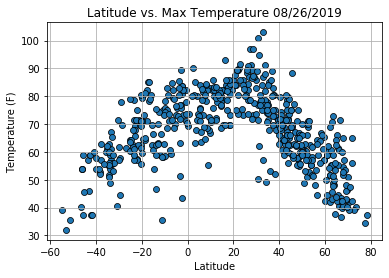

In [17]:
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", linewidth = .75)
plt.title(f"Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

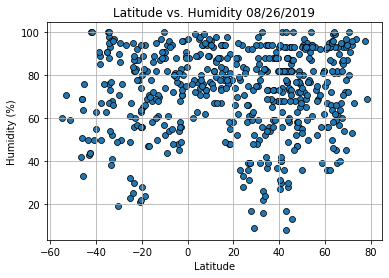

In [18]:
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", linewidth = .75)
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

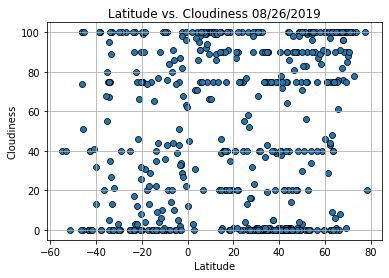

In [22]:
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", linewidth = .75)
plt.title(f"Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

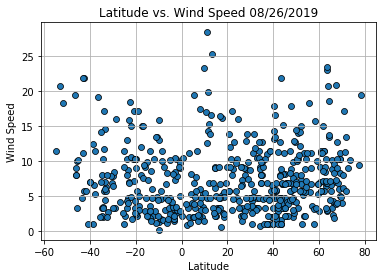

In [23]:
date = time.strftime("%m/%d/%Y")

plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black", linewidth = .75)
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Wind Speed.png")

plt.show()

In [21]:
#written description of three observable trends based on the data.

#1 - around this time of year, it is hottest between Latitude 0 and 40 and gets cooler the further you move away.
#2 - Wind speed is highest between lat 0 and 20, and lowest from 0 to -20 and 20 to 40. 
#3 - It appears to me more cloudy than not between lat 0 and 20.